# 2 分布

## 2.1 表示直方图

&emsp;&emsp;Think_Stats 的作者为本书编写了一个 `thinkstats2.py`，提供了书中需要用到的各种类和函数，其中的 `Hist` 类，用于表示直方图并提供操作方法。

``` python
class Hist(_DictWrapper):
    """
    用于表示直方图，即展示每个值到频数的图形

    参数可以是序列、字典、pandas 的 Series 对象，或者另一个 Hist 对象
    """
    def Freq(self, x):
        """
        获取与值x关联的频率

        Args:
            x: number value

        Returns:
            int frequency
        """
        return self.d.get(x, 0)

    def Freqs(self, xs):
        """
        获取一系列值的频率
        """
        return [self.Freq(x) for x in xs]

    def IsSubset(self, other):
        """
        检查此直方图中的值是否为其子集给定直方图中的值
        """
        for val, freq in self.Items():
            if freq > other.Freq(val):
                return False
        return True

    def Subtract(self, other):
        """
        从此直方图中减去给定直方图中的值
        """
        for val, freq in other.Items():
            self.Incr(val, -freq)
```

&emsp;&emsp;初始化一个 `Hist` 对象：

In [1]:
import thinkstats2

hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

&emsp;&emsp;调用 `Hist` 对象的 `Freq` 方法，返回传入的参数值的频数。

In [2]:
hist.Freq(2)

2

&emsp;&emsp;使用方括号操作符的结果也是一样。

In [3]:
hist[2]

2

&emsp;&emsp;如果传入的参数值不存在，频数则是 0。

In [4]:
hist.Freq(4)

0

&emsp;&emsp;`Values` 方法返回 Hist 对象中值的未排序列表。

In [5]:
hist.Values()

dict_keys([1, 2, 3, 5])

&emsp;&emsp;若要按序遍历 `Hist` 中的值，可以使用内建函数 `sorted`。

In [6]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


## 2.2 绘制直方图

&emsp;&emsp;作者还编写了一个 `thinkplot.py` 模块，可以提供各种函数用于绘制直方图及 `thinkstats2.py` 中定义的其他对象，下面使用 `thinkplot` 绘制 `hist`。

No handles with labels found to put in legend.


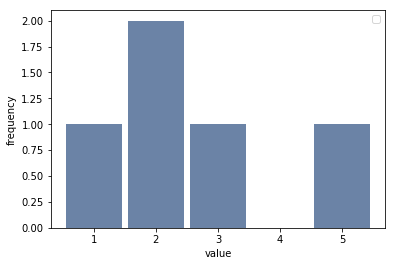

In [7]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

## 2.3 全国家庭增长调查中的变量

&emsp;&emsp;读入数据，选取成功生产的记录。

In [8]:
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1] #从数据框中选取满足条件的行

&emsp;&emsp;为 `live` 的 `birthwgt_lb` 列生成并绘制直方图。

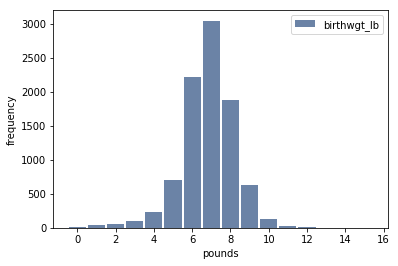

<Figure size 576x432 with 0 Axes>

In [9]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

&emsp;&emsp;通过直方图不难看出，**众数（mode）**为 7 磅，分布呈钟形。钟形是**正态（normal）分布**，即**高斯（Gaussian）分布**的形状。但结果的分布是不对称的，**尾端（tail）**向左侧延伸更长，这一点与正态分布不符。

&emsp;&emsp;接下来为 `agepreg` 列，即妊娠结束时的年龄，生成并绘制直方图。

In [10]:
import numpy as np

ages = np.floor(live.agepreg) #四舍五入年龄

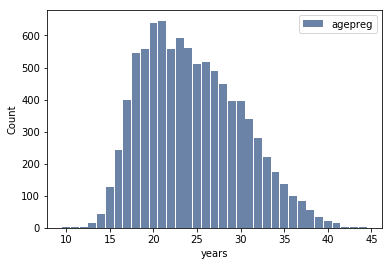

In [11]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

&emsp;&emsp;由图可知，众数为 21 岁，分布形状大致为钟形，但尾端向右延伸较长。

&emsp;&emsp;接下来为 `preglngth` 列，即妊娠周数，生成并绘制直方图。

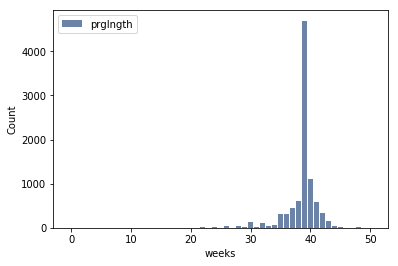

In [12]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

&emsp;&emsp;由图可知，最常见的值为 39 周，很少超过 43 周。

## 2.4 离群值

&emsp;&emsp;通过观察直方图，很容易发现最常出现的值，并能判断分布的形状，但不一定能看到很少出现的值。在进一步探索数据之前，最好检查一下**离群值（outlier）**。

&emsp;&emsp;`Hist` 对象提供 `Largest` 和 `Smallest` 方法，这两个方法的参数都是整数 `n`，分别返回直方图中 `n` 个最大和最小的值。

In [13]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [14]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


&emsp;&emsp;10 周以下的值显然不符合常理，很可能是数据没有进行正确的清洗，而从医学角度来看，大于 50 周的也几乎是不可能的。至于 10 至 30 周的，可能是早产，也可能是数据错误。对于这些离群值的处理，最佳方法依然是依赖于“领域知识”，即有关数据来源和意义的信息，另外也取决于打算对数据进行何种分析。

## 2.5 第一胎

&emsp;&emsp;现在可以选择第一胎和其他胎的婴儿进行比较，然后计算其直方图。

In [15]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

&emsp;&emsp;接着在同一坐标轴上绘制这两个直方图。

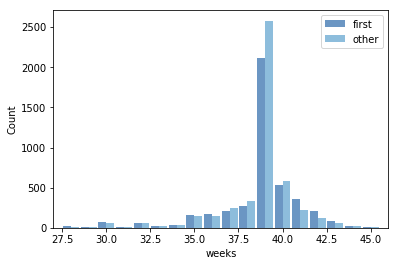

In [16]:
width = 0.45 #设置柱形宽度

thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

## 2.6 分布概述

&emsp;&emsp;直方图是一个样本分布的完整描述，如果一个分布的细节很重要，可能需要展示其直方图。但经常只需要几个描述性的统计量，对变量分布进行概述：
- 集中趋势：变量值是否聚集在某个值附近
- 众数：是否有多个聚集点
- 展布：变量的变化性如何
- 尾部：当值偏离众数时，其概率降低多快
- 离群值：是否有远离众数的极端值

&emsp;&emsp;**汇总统计量（summay statistic）**就是为回答上述问题而设计的，目前最常用的汇总统计量是**均值（mean）**，用于描述分布的**集中趋势（central tendency）**。

## 2.7 方差

&emsp;&emsp;**方差（variance）**是用于描述一个分布的变化或者**展布（spread）**的汇总统计量。方差的平方根是**标准差（standard deviation）**

&emsp;&emsp;Pandas 提供了计算均值、方差和标准差的方法。

In [17]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [18]:
print("妊娠期均值：{0} 周".format(mean))
print("妊娠期标准差：{0} 周".format(std))

妊娠期均值：38.56055968517709 周
妊娠期标准差：2.702343810070587 周


&emsp;&emsp;妊娠期的均值为 38.6 周，标准差为 2.7 周，也就是说，2~3 周偏差值是正常的。

## 2.8 效应量

&emsp;&emsp;**效应量（effect size）**是用于描述效应大小的汇总统计量。

&emsp;&emsp;要描述两个群组之间的差异，一个常用的方法是使用均值的差值，例如第一胎和其他胎的妊娠均值，及二者的差值。

In [19]:
print("第一胎妊娠均值：{0}".format(firsts.prglngth.mean()))
print("其他胎妊娠均值：{0}".format(others.prglngth.mean()))

print("二者差值：{0}".format(firsts.prglngth.mean() - others.prglngth.mean()))

第一胎妊娠均值：38.60095173351461
其他胎妊娠均值：38.52291446673706
二者差值：0.07803726677754952


&emsp;&emsp;假设这个估算是正确的，那么这个差值不具有实际意义。

&emsp;&emsp;另一种描述效应量的方法是将两个群组之间的差值与群组间的变化性进行比较，如 `Cohen’s d`，就是将两个群组均值之间的差值除以两个群组间的**合并标准差（pooled standard deviation）**。

In [20]:
def CohenEffectSize(group1, group2):
    """
        在两个群组之间计算 Cohen’s d
    
        Args:
            group1: Series or DataFrame
            group2: Series or DataFrame
    
        Returns: 
            float if the arguments are Series;
            Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [21]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449834

&emsp;&emsp;两组样本间的 `Cohen'd` 仅为 0.029，这个值非常的小。对比一下，男性与女性身高差的这个值约为 1.7。

## 2.9 术语

> - 分布（distribution）
> 
> &emsp;&emsp;样本中的值以及每个值出现的频数
> 
> - 直方图（histogram）
> 
> &emsp;&emsp;从值到频数的映射，或者展示这一映射的图形
> 
> - 频数（frequency）
> 
> &emsp;&emsp;一个值在样本中出现的次数
> 
> - 众数（mode）
> 
> &emsp;&emsp;一个样本中最常出现的值，或者最常出现的值之一
> 
> - 正态分布（normal distribution）
> 
> &emsp;&emsp;钟形的理想化分布，也称为高斯分布
> 
> - 均匀分布（uniform distribution）
> 
> &emsp;&emsp;所有值具有相同频数的分布
> 
> - 尾部（tail）
> 
> &emsp;&emsp;一个分布中最高端和最低端的部分
> 
> - 集中趋势（central tendency）
> 
> &emsp;&emsp;样本或总体的一个特征 *#直观上，这一特征是一个平均值或典型值*
> 
> - 离群值（outlier）
> 
> &emsp;&emsp;远离集中趋势的值
> 
> - 展布（spread）
> 
> &emsp;&emsp;对值在分布中扩展规模的度量
> 
> - 汇总统计量（summary statistic）
> 
> &emsp;&emsp;对分布的某些方面（如集中趋势或展布）进行量化的统计量
> 
> - 方差（variance）
> 
> &emsp;&emsp;一种汇总统计量，常用于量化展布
> 
> - 标准差（standard deviation）
> 
> &emsp;&emsp;方差的平方根，也用于量化展布
> 
> - 效应量（effect size）
> 
> &emsp;&emsp;一种汇总统计量，用于量化一个效应的大小，如群组之间的差异
> 
> - 临床显著（clinically significant）
> 
> &emsp;&emsp;在实践中有意义的结果，如群组之间的差异
> 